# Numerical Analysis (Math 445 and 545)

## Lecture 15 - Error Analysis of NSODEs

**Author: Daniel Poll**
<br>
**Date: March 8, 2020**

## Motivation 

In the previous lecture, we discussed how algorithms we have already seen, namely Taylor expansions and numerical integration schemes, can be applied find approximations of solutions to differential equations. And, as we have seen in those previous algorithms, these approximations have some error due to neglecting higher order terms. We will spend some time proving the error in the previous algorithms and how to find the error in general. 

## Local Truncation Error Analysis

We will start with the easiest method: forward Euler. We will derive our error, and most errors in general, through the use of Taylor expansions. Suppose $x$ is sufficiently smooth. Although we could still derive error estimates if we break this condition, in the interest of time and sanity, we will focus on error analysis under this assumption. 

First, let's consider some time point $t_k$ and let $x(t_k) = x_k$ be the value of $x$ at time $t_k$ . We define the next time point in our algorithm as $t_{k+1} = t_k + h$. So, by Taylor expanding back to $t_k$ from $t_{k+1}$, we have a Taylor expansion for the exact value of $x(t_{k+1})$:

$$
x(t_{k+1}) = x(t_k + h) = x(t_k) + h x'(t_k) + \frac{h^2}{2} x''(t_k) + \mathcal{O}(h^3) 
$$

According to our forward Euler algorithm, we compute the next step using the first derivative, i.e.

$$
x_{k+1} = x_k + h f(t_k,x_k) 
$$

Note that $x(t_{k+1}) \not =  x_{k+1}$. There is some error. To compute this error, we now define $e_k := |x(t_{k}) - x_k|$ and note $x'(t_k) = f(t_k,x(t_k)) = f(t_k,x_k)$. Then, subtracting the above equations:

$$
e_{k+1} = |x(t_k) + h x'(t_k) - x_k - h f(t_k,x_k) + \mathcal{O}(h^2)| = \mathcal{O}(h^2)
$$

So, we say the *local error* for the forward Euler method is $\mathcal{O}(h^2)$. This is the error our numerical algorithm makes in one time-step. Notice this also does not account for machine-error, such as rounding. But, in general, our step-size will be much larger than machine-error when using $64$-bit precision, so it can usually be neglected in the analysis.

Let's repeat our analysis for the more general method, the *theta* method, which contains the forward and backward Euler as well as the trapezoidal (or Crank-Nicoloson) rule. We again assume $x(t_k) = x_k$ and Taylor expand $x(t_{k+1}) = x(t_k + h)$:

$$
x(t_{k+1}) = x(t_k) + h x'(t_k) + \frac{h^2}{2} x''(t_k) + \frac{h^3}{6} x'''(t_k) + \mathcal{O}(h^4)
$$

And, recalling the theta method:

$$
x_{k+1} = x_k + h\big( \theta f(t_k,x_k) + (1-\theta) f(t_{k+1},x_{k+1}) \big) = x_k + h \big( \theta f(t_k,x_k) + (1-\theta)\big(f(t_k,x_k) + hf'(t_k,x_k) + \frac{h^2}{2} f''(t_k,x_k)\big)\big) + \mathcal{O}(h^4)
$$

We subtract the two to find:

$$
e_{k+1} = \big| hx'(t_k) - h( \theta + 1 - \theta )f(t_k,x_k) + \frac{h^2}{2} x''(t_k) - h^2(1-\theta)f'(t_k,x_k) + \frac{h^3}{6}x'''(t_k) - (1-\theta)\frac{h^2}{2} f''(t_k,x_k) \big| + \mathcal{O}(h^4)
$$

Noting that $x' = f$, so $x'' = f'$ and so on, we have in more compact form:
$$
e_{k+1} = \big|  h^2 \big(\theta - \frac{1}{2} \big) x''(t_k) + h^3 \big(\frac{\theta}{2} - \frac{1}{3} \big)x'''(t_k) \big| + \mathcal{O}(h^4)
$$

If we choose $\theta = 1/2$, then we find $e_{k+1} = \mathcal{O}(h^3)$ as the local error of the trapezoidal rule. Any choice of $\theta \not = 1/2$ but still in the interval $[0,1]$ will guarantee $\mathcal{O}(h^2)$ local error, such as with the forward and backward Euler methods. Unfortunately, there is no way to get purely $\mathcal{O}(h^4)$ accuracy with this method.

But, this does lead to an important point. Given our analysis, why would we ever choose something other than $\theta = 0, 1/2,$ or $1$? Suppose that $f''$ (or equivalently $x'''$) is ill-behaved, such as having an extremely large derivative. Then, in (problem-dependent) circumstances, we may be better off removing the $\mathcal{O}(h^3)$ term by setting $\theta = 2/3$ and keeping the overall lower accuracy.  

## Global Error Analysis

The local error tells us the approximate error we make at each step, $h$. However, in practice, we are interested in simulating a differential equation over some time interval $[a,b]$.  Given a step-size $h$, it will take $(b-a)/h$ steps to go from $a$ to $b$. However, we should first relate errors between steps, then use this fact. For forward Euler's method, notice that we can write

$$
x(t_{k+1}) - x_{k+1} = x(t_k) - x_k + hf(t_k,x(t_k)) - h f(t_k,x_k)
$$

from before. If we no longer assume $x(t_k) = x_k$, then instead use a Mean Value Theorem application for $f$. We know there exists some point $\nu \in [x(t_k),x_k]$ such that $f(t_k,x(t_k)) = f(t_k,x_k) + f'(t_k,\nu)(x(t_k) - x_k)$. Then, our equation simplifies to:

$$
x(t_{k+1}) - x_{k+1} = x(t_k) - x_k + hf(t_k,x(t_k)) - hf(t_k,x_k) = \big(1 + hf'(t_k,\nu)\big)(x(t_k) - x_k)
$$

Thus, if $|f'| \leq M$ for some constant $M$, then

$$
e_{k+1} \leq (1+hM) e_k
$$

Now, each step we make some $\mathcal{O}(h^2)$ error, dependent on the second derivative. So, constructing iteratively, we have:

$$
e_0 = 0 \implies e_1 \leq Ch^2 \implies e_2 \leq (1+hM)e_1 + Ch^2 = (2+hM) Ch^2
$$

Repeating this process, we find
$$
e_{k+1} \leq Ch^2 \sum_{n=1}^{k} (1+hM)^n
$$

This is a finite geometric series, so we can find an exact closed form solution as:
$$
e_{k+1} \leq Ch^2 \big( (1+hM)^k + \frac{(1+hM)^k}{hM} - \frac{1}{hM} \big)
$$
It's important to note that we care about the end of our simulation, i.e. when ${k+1} = (b-a)/h$. So, plugging this into the equation, and expanding the factors, we find after some truncation:

\begin{align*}
e_{k+1} &\leq Ch^2 \big( 1 + k hM + \frac{k(k-1)}{2} (hM)^2 + \frac{1}{hM} + k + \frac{k(k-1)}{2} hM - \frac{1}{hM} \big) + \mathcal{O}(h^3) \\
 &= Ch^2\big(1 + M_1 + M_2 + \frac{b-a}{h}-1 + \frac{(b-a)^2M}{h} + M_3 \big) + \mathcal{O}(h^3) \\
 &= Ch^2\big( \frac{b-a}{h} + \frac{(b-a)^2M}{h} \big) + \mathcal{O}(h^2) \leq \tilde{C}h
\end{align*}

So, in fact, we actually lose one order of accuracy. So, while the *local error* of forward Euler is $\mathcal{O}(h^2)$, the *global error* is $\mathcal{O}(h)$, which is very poor. This is one of many reasons why forward Euler is considered a poor algorithm. It may be easy, but it's global error is very bad.

Note: In general, when we refer to the order of error in differential equations, we usually mean the global error. It's rare for local truncation error to be discussed except in derivations. And, except in special cases, it's easy to go from one to the other. Heuristically, the global error is the local error times the number of steps, which is roughly $(1/h)$, up to some constant dependent on the interval length. 

## Python Comparisons

Let's do an example in Python. We'll start with a fairly simple initial value problem, which has applications in phsyics
$$
T' = k(T-T_\text{eq}), \; \; \; T(0) = T_0
$$

This is *Newton's law of cooling*. It's linear, so we will be able to easily do explicit and implicit numerical schemes. Here $T_\text{eq}$ is the equilibrium temperature of the room or object and $k$ is the rate for heat transfer. The value $T_0$ is our starting temperature, i.e. if I brought a hot cup of coffee into a classroom. The temperature will relax down to room temperature as time goes on. 


[14.51472608  0.23110807]
[ 1.39631762 -0.02290002]


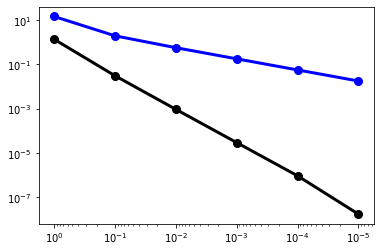

In [7]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def dydt(T,Teq,a):
    dydt = a*(T-Teq)
    return dydt

## Static Parameters
n = 100
h = 0.01
t0 = 0
T0 = 50
Teq = 10
a = -1
pwr = 6

eEuler = np.zeros(pwr)
eTrap = np.zeros(pwr)
hplt = np.zeros(pwr)
nplt = np.zeros(pwr)

for i in range(0,pwr):
    ## Dependent Parameters
    n = 10 ** i
    nplt[i] = n
    hplt[i] = 1/n
    h = 1/n

    ## Initialize arrys
    t = np.zeros(n+1)
    t[0] = t0
    T = np.zeros(n+1)
    T[0] = T0
    S = np.zeros(n+1)
    S[0] = T0
    Texact = np.zeros(n+1)

    ## Run Euler's Method
    for k in range(0,n):
        t[k+1] = t[k] + h
        T[k+1] = T[k] + h*dydt(T[k],Teq,a)
    

    ## Run Crank-Nicoloson Method
    for k in range(0,n):
        S[k+1] = ( S[k] - h*a*Teq + (h/2)*a*S[k] ) / (1-a*(h/2))

    
    ## Exact Solution
    Texact = Teq + (T0-Teq)*np.exp(a*t)

    ## Compute Least-Squared (l2) errors
    eEuler[i] = la.norm(T-Texact,2)
    eTrap[i] = la.norm(S-Texact,2)

cEuler = np.polyfit(hplt, eEuler,1)
cTrap = np.polyfit(hplt,eTrap,1)

print(cEuler)
print(cTrap)

plt.plot(hplt,eEuler,'b.-',LineWidth=3,Markersize=16)
plt.plot(hplt,eTrap,'k.-',LineWidth=3,Markersize=16)
plt.yscale("log")
plt.xscale("log") 
plt.gca().invert_xaxis()
plt.show()


    

## Exercises

### Exercise 1

Prove the backward Euler method discussed in Lecture 14 has $\mathcal{O}(h^2)$ local error and $\mathcal{O}(h)$ global error. 

### Exercise 2

Simulate $x' = -a(x-x_0)$ using the Backward Euler method. Use the parameters given in the code above.